# ANN for image classification using TF

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist

In [ ]:
X_train, y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:],y_train_full[-5000:]


In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

In [ ]:
#Defining class labels
class_names = ["T_shirt/top", "Trouser","Pukllover","Dress","Coat","Sandal","Shirt",
               "Sneaker","Bag","Ankle"]
len(class_names)

10

In [ ]:
#Displaying first trainng image matrix
X_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
X_train[0,:,:].shape

(28, 28)

Text(0.5, 1.0, 'T_shirt/top')

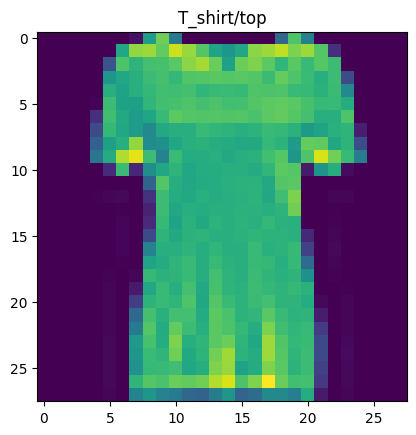

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[10,:,:])
plt.title(class_names[y_train[10]])

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
#Normalization
X_train,X_valid,X_test = X_train/255.,X_valid/255.,X_test/255.

Text(0.5, 1.0, 'Sandal')

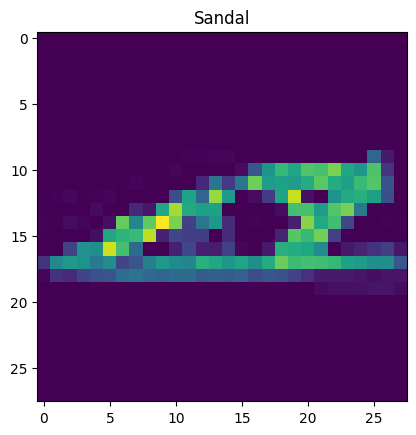

In [ ]:
plt.imshow(X_train[155,:,:])
plt.title(class_names[y_train[155]])

In [ ]:
X_train[155,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(200,activation="relu"))
model.add(tf.keras.layers.Dense(150,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))

model.add(tf.keras.layers.Dense(10,activation="softmax"))
          #softmax for decision making



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 100)               15100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 341960 (1.30 MB)
Trainable params: 34196

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_data =(X_valid,y_valid),batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7458 - accuracy: 0.7468 - val_loss: 0.4899 - val_accuracy: 0.8270
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4764 - accuracy: 0.8300 - val_loss: 0.4806 - val_accuracy: 0.8242
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4222 - accuracy: 0.8487 - val_loss: 0.4226 - val_accuracy: 0.8518
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3937 - accuracy: 0.8600 - val_loss: 0.3866 - val_accuracy: 0.8608
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3699 - accuracy: 0.8662 - val_loss: 0.3660 - val_accuracy: 0.8682
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3510 - accuracy: 0.8725 - val_loss: 0.3876 - val_accuracy: 0.8644
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3368 - accuracy: 0.8774 - val_loss: 0.3570 - val_accuracy:

In [ ]:
history.history['val_accuracy']

[0.8245999813079834,
 0.8331999778747559,
 0.8497999906539917,
 0.8618000149726868,
 0.8646000027656555,
 0.8644000291824341,
 0.866599977016449,
 0.8691999912261963,
 0.8763999938964844,
 0.8773999810218811]